<a href="https://colab.research.google.com/github/AlchemyDojo/LucidDreamer/blob/main/Copy_of_LucidDreamer_FineTuningNormalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  LucidDreamer v.0.0.1
Generative Art AI 

Generate images from text phrases 

* This is an upgraded and translated fork of VQGAN and CLIP (z + quantize method with augmentations) with a  full user guide friendly expanded interface in English, and enhanced media output controls. 

This project developed and maintained by u/cosm.loci / / cosm.loci#4958

# Quickstart Guide:  
- Run 'Restart Kernel' cell below
- In 'prompt' cell below - change the text to your idea
- Top menu -  Runtime > Restart and run All
  - if this option is not available Run 'Researt Kernel' again


In [ ]:
# @title Restart Kernel
# @markdown Licensed under the MIT License
# @markdown
# @markdown  - attribution can be found in the final cell.

# Copyright (c) 2021 Katherine Crowson

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

In [ ]:
prompt = "Feline facial expression which can be interpreted in many ways dependent to context in the styles of physical based rendering Disney Anime Artstation HQ contest winner"

In [ ]:
# @title HOW TO USE THIS NOTEBOOK (basic usage)
# @markdown A note to users unfamiliar with Collab or Jupyter Notebooks: each unique section of this document is known as a "cell".  
# @markdown 
# @markdown While this notebook has many advanced features, the user guide was written with both code newbies and ninjas alike, in the hopes that users find themselve inspired to further pursue the rabbit hole that is generative art.
# @markdown 
# @markdown `Instructions:`
# @markdown 
# @markdown - 1.) Restart Kernel by clicking play button to the left of  in the second cell of the notebook.
# @markdown 
# @markdown - 2.) Change the `prompt` found at the top of the notebook.  For new users, this is the only change from default settings that is recommended, skip to step 5.
# @markdown 
# @markdown - 3.) Select the Model(s) - (note: some models have been known to cause errors, so if you are having issues, just use the default settings). Restarting Kernal deletes downloaded models
# @markdown 
# @markdown - 4.) Change any other Parameters you wish. If you have selected any models other than the default, make sure to use the dropdown labeled `modelo:` to additionally selcet it here. 
# @markdown 
# @markdown - 5.) Once all Parameters are to your liking, click the top menu > Runtime > Restart and Run All
# @markdown 
# @markdown - 6.) Be patient. The program often takes about 15-20+ minutes when `Max_iterations` is set to 401 and model is defaulted to imagenet16384.  Additionally, the use of models other than the default can drastically increase the program runtime; casual users are encouraged to leave the model as default.
# @markdown 
# @markdown - 7.) While the program is running, you will see iterative outputs inside the cell named "Do the Execution". Once the program has completed it will take all the outputs and create a video that should automatically ask to download.
# @markdown
# @markdown - 8.) Video output settings can be modified to users liking, with the default settings prodcuing a 10second mp4. If planning to post to an image boards with size limits, it is recommended you convert your .mp4 to a .webm using vp8 codec. users have reported success with cloudconvert.com and handbrake.  Future versions of this notebook will contain encoding options and other advance media controls.
# @markdown 
# @markdown - 9.) ?
# @markdown
# @markdown - 10.) Profit

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

working_dir = '/content/gdrive/MyDrive/vqgan'
# working_dir = '/content'

Mounted at /content/gdrive


In [ ]:
!nvidia-smi

Mon Jan 10 06:46:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# @title Installing the Libraries
# @markdown This cell will take a while because you have to download multiple libraries
# @markdown
# @markdown This might take some time, be patient.
# @markdown 
# @markdown You can track the progress of each cell by observing the play button, when a cell is complete, a green check-mark will appear.  
print("Downloading CLIP...")
!git clone https://github.com/openai/CLIP                 &> /dev/null
 
print("Installing Python Libraries for AI...")
!git clone https://github.com/CompVis/taming-transformers &> /dev/null
!pip install ftfy regex tqdm omegaconf pytorch-lightning  &> /dev/null
!pip install kornia                                       &> /dev/null
!pip install einops                                       &> /dev/null
!pip install transformers

print("Installing libraries for metadata management...")
!pip install stegano                                      &> /dev/null
!apt install exempi                                       &> /dev/null
!pip install python-xmp-toolkit                           &> /dev/null
!pip install imgtag                                       &> /dev/null
!pip install pillow==7.1.2                                &> /dev/null
 
print("Installing Python libraries for video creation...")
!pip install imageio-ffmpeg &> /dev/null
!pip install webm
!mkdir steps
print("Installation completed.")

Installing Python Libraries for AI...
     |████████████████████████████████| 3.4 MB 5.5 MB/s 
     |████████████████████████████████| 61 kB 449 kB/s 
     |████████████████████████████████| 3.3 MB 35.3 MB/s 
     |████████████████████████████████| 895 kB 45.0 MB/s 
Installing libraries for metadata management...
Installing Python libraries for video creation...
Installation completed.


In [ ]:
#@title Selection of models to download
#@markdown By default, the notebook downloads model 16384 from ImageNet. There are other models that are not downloaded by default, since downloading them adds considerable length to the runtime and most user should simply use the default model. For advanced users who want to use them, simply select the models to download based on the criteria below:
#@markdown
#@markdown ---
#@markdown Here are what the different models option are good for (based on limited research on them)
#@markdown 
#@markdown Best general performance and recommended for most users
#@markdown - imagenet_1024, imagenet_16384, 
#@markdown
#@markdown Basically anything with mixed quality with using 'in the style of artist name' at the end of the prompt
#@markdown - wikiart_1024 , wikiart_16384
#@markdown 
#@markdown Landscapes
#@markdown - sflckr, ade20k
#@markdown   
#@markdown Faces
#@markdown - faceshq , ffhq , celebahq
#@markdown
#@markdown Problematic models, but can handle basically anything, but it doesn't give the best results on its own unless you're purposely doing weird abstract stuff. COCO_Stuff download has known to cause excessively long run times, and Gumbel has been problematic, avoid using both of these unless you are an expert user.
#@markdown - coco, gumbel_8192 


In [ ]:
#@markdown ---
#@markdown Select from Available Models
#@markdown ---
#@markdown ---
imagenet_1024 = False #@param {type:"boolean"}
imagenet_16384 = True #@param {type:"boolean"}
wikiart_1024 = False #@param {type:"boolean"}
wikiart_16384 = False #@param {type:"boolean"}
sflckr = False #@param {type:"boolean"}
ade20k = False #@param {type:"boolean"}
faceshq = False #@param {type:"boolean"}
ffhq = False #@param {type:"boolean"}
celebahq = False #@param {type:"boolean"}
coco = False #@param {type:"boolean"}
gumbel_8192 = False #@param {type:"boolean"}

if imagenet_1024:
  !curl -L -o > vqgan_imagenet_f16_1024.yaml -C - 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' 
  !curl -L -o > vqgan_imagenet_f16_1024.ckpt -C - 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fckpts%2Flast.ckpt&dl=1' 
if imagenet_16384:
  !curl -L -o vqgan_imagenet_f16_16384.yaml -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1'
  !curl -L -o vqgan_imagenet_f16_16384.ckpt -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fckpts%2Flast.ckpt&dl=1'    
#if imagenet_1024:
#  !curl -L -o vqgan_imagenet_f16_1024.yaml -C - 'http://mirror.io.community/blob/vqgan/vqgan_imagenet_f16_1024.yaml' #ImageNet 1024
#  !curl -L -o vqgan_imagenet_f16_1024.ckpt -C - 'http://mirror.io.community/blob/vqgan/vqgan_imagenet_f16_1024.ckpt'  #ImageNet 1024
#if imagenet_16384:
#  !curl -L -o vqgan_imagenet_f16_16384.yaml -C - 'http://mirror.io.community/blob/vqgan/vqgan_imagenet_f16_16384.yaml' #ImageNet 16384
#  !curl -L -o vqgan_imagenet_f16_16384.ckpt -C - 'http://mirror.io.community/blob/vqgan/vqgan_imagenet_f16_16384.ckpt' #ImageNet 16384
if wikiart_1024: 
  !curl -L -o wikiart_1024.yaml -C - 'http://mirror.io.community/blob/vqgan/wikiart.yaml' #WikiArt 1024
  !curl -L -o wikiart_1024.ckpt -C - 'http://mirror.io.community/blob/vqgan/wikiart.ckpt' #WikiArt 1024
if wikiart_16384: 
  !curl -L -o wikiart_16384.yaml -C - 'http://mirror.io.community/blob/vqgan/wikiart_16384.yaml' #WikiArt 16384
  !curl -L -o wikiart_16384.ckpt -C - 'http://mirror.io.community/blob/vqgan/wikiart_16384.ckpt' #WikiArt 16384
if sflckr:
  !curl -L -o sflckr.yaml -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fconfigs%2F2020-11-09T13-31-51-project.yaml&dl=1' #S-FLCKR
  !curl -L -o sflckr.ckpt -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fcheckpoints%2Flast.ckpt&dl=1' #S-FLCKR
if ade20k:
  !curl -L -o ade20k.yaml -C - 'https://static.miraheze.org/intercriaturaswiki/b/bf/Ade20k.txt' #ADE20K
  !curl -L -o ade20k.ckpt -C - 'https://app.koofr.net/content/links/0f65c2cd-7102-4550-a2bd-07fd383aac9e/files/get/last.ckpt?path=%2F2020-11-20T21-45-44_ade20k_transformer%2Fcheckpoints%2Flast.ckpt' #ADE20K
if faceshq:
  !curl -L -o faceshq.yaml -C - 'https://drive.google.com/uc?export=download&id=1fHwGx_hnBtC8nsq7hesJvs-Klv-P0gzT' #FacesHQ
  !curl -L -o faceshq.ckpt -C - 'https://app.koofr.net/content/links/a04deec9-0c59-4673-8b37-3d696fe63a5d/files/get/last.ckpt?path=%2F2020-11-13T21-41-45_faceshq_transformer%2Fcheckpoints%2Flast.ckpt' #FacesHQ
if ffhq:
  !curl -L -o ffhq.yaml -C - 'https://app.koofr.net/content/links/0fc005bf-3dca-4079-9d40-cdf38d42cd7a/files/get/2021-04-23T18-19-01-project.yaml?path=%2F2021-04-23T18-19-01_ffhq_transformer%2Fconfigs%2F2021-04-23T18-19-01-project.yaml&force' #FFHQ
  !curl -L -o ffhq.ckpt -C - 'https://app.koofr.net/content/links/0fc005bf-3dca-4079-9d40-cdf38d42cd7a/files/get/last.ckpt?path=%2F2021-04-23T18-19-01_ffhq_transformer%2Fcheckpoints%2Flast.ckpt&force' #FFHQ
if celebahq:
  !curl -L -o celebahq.yaml -C - 'https://app.koofr.net/content/links/6dddf083-40c8-470a-9360-a9dab2a94e96/files/get/2021-04-23T18-11-19-project.yaml?path=%2F2021-04-23T18-11-19_celebahq_transformer%2Fconfigs%2F2021-04-23T18-11-19-project.yaml&force' #CelebA-HQ
  !curl -L -o celebahq.ckpt -C - 'https://app.koofr.net/content/links/6dddf083-40c8-470a-9360-a9dab2a94e96/files/get/last.ckpt?path=%2F2021-04-23T18-11-19_celebahq_transformer%2Fcheckpoints%2Flast.ckpt&force' #CelebA-HQ
if coco:
  !curl -L -o coco.yaml -C - 'https://dl.nmkd.de/ai/clip/coco/coco.yaml' #COCO
  !curl -L -o coco.ckpt -C - 'https://dl.nmkd.de/ai/clip/coco/coco.ckpt' #COCO
if gumbel_8192:
  !curl -L -o gumbel_8192.yaml -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #Gumbel 8192
  !curl -L -o gumbel_8192.ckpt -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fckpts%2Flast.ckpt&dl=1' #Gumbel 8192


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   692  100   692    0     0   1438      0 --:--:-- --:--:-- --:--:--  112k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  934M  100  934M    0     0  14.8M      0  0:01:02  0:01:02 --:--:-- 14.9M


In [ ]:
# @title Loading libraries and definitions
 
import argparse
import math
from pathlib import Path
import sys
 
sys.path.append('./taming-transformers')
from IPython import display
from base64 import b64encode
from omegaconf import OmegaConf
from PIL import Image
from taming.models import cond_transformer, vqgan
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm.notebook import tqdm
 
from CLIP import clip
import kornia.augmentation as K
import numpy as np
import imageio
from PIL import ImageFile, Image
from imgtag import ImgTag    # metadata 
from libxmp import *         # metadata
import libxmp                # metadata
from stegano import lsb
import json
ImageFile.LOAD_TRUNCATED_IMAGES = True
 
def sinc(x):
    return torch.where(x != 0, torch.sin(math.pi * x) / (math.pi * x), x.new_ones([]))
 
 
def lanczos(x, a):
    cond = torch.logical_and(-a < x, x < a)
    out = torch.where(cond, sinc(x) * sinc(x/a), x.new_zeros([]))
    return out / out.sum()
 
 
def ramp(ratio, width):
    n = math.ceil(width / ratio + 1)
    out = torch.empty([n])
    cur = 0
    for i in range(out.shape[0]):
        out[i] = cur
        cur += ratio
    return torch.cat([-out[1:].flip([0]), out])[1:-1]
 
 
def resample(input, size, align_corners=True):
    n, c, h, w = input.shape
    dh, dw = size
 
    input = input.view([n * c, 1, h, w])
 
    if dh < h:
        kernel_h = lanczos(ramp(dh / h, 2), 2).to(input.device, input.dtype)
        pad_h = (kernel_h.shape[0] - 1) // 2
        input = F.pad(input, (0, 0, pad_h, pad_h), 'reflect')
        input = F.conv2d(input, kernel_h[None, None, :, None])
 
    if dw < w:
        kernel_w = lanczos(ramp(dw / w, 2), 2).to(input.device, input.dtype)
        pad_w = (kernel_w.shape[0] - 1) // 2
        input = F.pad(input, (pad_w, pad_w, 0, 0), 'reflect')
        input = F.conv2d(input, kernel_w[None, None, None, :])
 
    input = input.view([n, c, h, w])
    return F.interpolate(input, size, mode='bicubic', align_corners=align_corners)
 
 
class ReplaceGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x_forward, x_backward):
        ctx.shape = x_backward.shape
        return x_forward
 
    @staticmethod
    def backward(ctx, grad_in):
        return None, grad_in.sum_to_size(ctx.shape)
 
 
replace_grad = ReplaceGrad.apply
 
 
class ClampWithGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, min, max):
        ctx.min = min
        ctx.max = max
        ctx.save_for_backward(input)
        return input.clamp(min, max)
 
    @staticmethod
    def backward(ctx, grad_in):
        input, = ctx.saved_tensors
        return grad_in * (grad_in * (input - input.clamp(ctx.min, ctx.max)) >= 0), None, None
 
 
clamp_with_grad = ClampWithGrad.apply
 
 
def vector_quantize(x, codebook):
    d = x.pow(2).sum(dim=-1, keepdim=True) + codebook.pow(2).sum(dim=1) - 2 * x @ codebook.T
    indices = d.argmin(-1)
    x_q = F.one_hot(indices, codebook.shape[0]).to(d.dtype) @ codebook
    return replace_grad(x_q, x)
 
 
class Prompt(nn.Module):
    def __init__(self, embed, weight=1., stop=float('-inf')):
        super().__init__()
        self.register_buffer('embed', embed)
        self.register_buffer('weight', torch.as_tensor(weight))
        self.register_buffer('stop', torch.as_tensor(stop))
 
    def forward(self, input):
        input_normed = F.normalize(input.unsqueeze(1), dim=2)
        embed_normed = F.normalize(self.embed.unsqueeze(0), dim=2)
        dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2)
        dists = dists * self.weight.sign()
        return self.weight.abs() * replace_grad(dists, torch.maximum(dists, self.stop)).mean()
 
 
def parse_prompt(prompt):
    vals = prompt.rsplit(':', 2)
    vals = vals + ['', '1', '-inf'][len(vals):]
    return vals[0], float(vals[1]), float(vals[2])
 
 
class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow
        self.augs = nn.Sequential(
            K.RandomHorizontalFlip(p=0.5),
            # K.RandomSolarize(0.01, 0.01, p=0.7),
            K.RandomSharpness(0.3,p=0.4),
            K.RandomAffine(degrees=30, translate=0.1, p=0.8, padding_mode='border'),
            K.RandomPerspective(0.2,p=0.4),
            K.ColorJitter(hue=0.01, saturation=0.01, p=0.7))
        self.noise_fac = 0.1
 
 
    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        for _ in range(self.cutn):
            size = int(torch.rand([])**self.cut_pow * (max_size - min_size) + min_size)
            offsetx = torch.randint(0, sideX - size + 1, ())
            offsety = torch.randint(0, sideY - size + 1, ())
            cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
            cutouts.append(resample(cutout, (self.cut_size, self.cut_size)))
        batch = self.augs(torch.cat(cutouts, dim=0))
        if self.noise_fac:
            facs = batch.new_empty([self.cutn, 1, 1, 1]).uniform_(0, self.noise_fac)
            batch = batch + facs * torch.randn_like(batch)
        return batch
 
 
def load_vqgan_model(config_path, checkpoint_path):
    config = OmegaConf.load(config_path)
    if config.model.target == 'taming.models.vqgan.VQModel':
        model = vqgan.VQModel(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.cond_transformer.Net2NetTransformer':
        parent_model = cond_transformer.Net2NetTransformer(**config.model.params)
        parent_model.eval().requires_grad_(False)
        parent_model.init_from_ckpt(checkpoint_path)
        model = parent_model.first_stage_model
    else:
        raise ValueError(f'unknown model type: {config.model.target}')
    del model.loss
    return model
 
 
def resize_image(image, out_size):
    ratio = image.size[0] / image.size[1]
    area = min(image.size[0] * image.size[1], out_size[0] * out_size[1])
    size = round((area * ratio)**0.5), round((area / ratio)**0.5)
    return image.resize(size, Image.LANCZOS)

## Instructions for setting parameters:

| Parameter  |  Usage |
|---|---|
| `key_frames` | Whether to use key frames to change the parameters over the course of the run |
|  `text_prompts` |  Text prompts, separated by "\|" |
| `width` | Width of the output, in pixels. This will be rounded down to a multiple of 16 |
| `height` | Height of the output, in pixels. This will be rounded down to a multiple of 16 |
| `model` | Choice of model, must be downloaded above |
| `interval` | How often to display the frame in the notebook (doesn't affect the actual output) |
| `initial_image` | Image to start with (relative path to file) |
| `target_images` | Image prompts to target, separated by "|" (relative path to files) |
| `seed` | Random seed, if set to a positive integer the run will be repeatable (get the same output for the same input each time, if set to -1 a random seed will be used. |
| `max_frames` | Number of frames for the animation |
| `angle` | Angle in degrees to rotate clockwise between each frame |
| `zoom` | Factor to zoom in each frame, 1 is no zoom, less than 1 is zoom out, more than 1 is zoom in (negative is uninteresting, just adds an extra 180 rotation beyond that in angle) |
| `translation_x` | Number of pixels to shift right each frame |
| `translation_y` | Number of pixels to shift down each frame |
| `iterations_per_frame` | Number of times to run the VQGAN+CLIP method each frame |
| `save_all_iterations` | Debugging, set False in normal operation |

---------

Transformations (zoom, rotation, and translation)

On each frame, the network restarts, is fed a version of the output zoomed in by `zoom` as the initial image, rotated clockwise by `angle` degrees, translated horizontally by `translation_x` pixels, and translated vertically by `translation_y` pixels. Then it runs `iterations_per_frame` iterations of the VQGAN+CLIP method. 0 `iterations_per_frame` is supported, to help test out the transformations without changing the image.

For `iterations_per_frame = 1` (recommended for more abstract effects), the resulting images will not have much to do with the prompts, but at least one prompt is still required.

In normal use, only the last iteration of each frame will be saved, but for trouble-shooting you can set `save_all_iterations` to True, and every iteration of each frame will be saved.

----------------

Mainly what you will have to modify will be `text_prompts`: there you can place the prompt(s) you want to generate (separated with |). It is a list because you can put more than one text, and so the AI tries to 'mix' the images, giving the same priority to both texts. You can also assign weights, to bias the priority towards one prompt or another, or negative weights, to remove an element (for example, a colour).

Example of weights with decimals:

Text : rubber:0.5 | rainbow:0.5

To use an initial image to the model, you just have to upload a file to the Colab environment (in the section on the left), and then modify `initial_image`: putting the exact name of the file. Example: sample.png

You can also change the model by changing the line that says `model`. Currently 1024, 16384, WikiArt, S-FLCKR and COCO-Stuff are available. To activate them you have to have downloaded them first, and then you can simply select it.

You can also use `target_images`, which is basically putting one or more images on it that the AI will take as a "target", fulfilling the same function as putting text on it. To put more than one you have to use | as a separator.

------------

Key Frames

If `key_frames` is set to True, you are able to change the parameters over the course of the run.
To do this, put the parameters in in the following format:
10:(0.5), 20: (1.0), 35: (-1.0)

This means at frame 10, the value should be 0.5, at frame 20 the value should be 1.0, and at frame 35 the value should be -1.0. The value at each other frame will be linearly interpolated (that is, before frame 10, the value will be 0.5, between frame 10 and 20 the value will increase frame-by-frame from 0.5 to 1.0, between frame 20 and 35 the value will decrease frame-by-frame from 1.0 to -1.0, and after frame 35 the value will be -1.0)

This also works for text_prompts, e.g. 10:(Apple: 1| Orange: 0), 20: (Apple: 0| Orange: 1| Peach: 1)
will start with an Apple value of 1, once it hits frame 10 it will start decreasing in in Apple and increasing in Orange until it hits frame 20. Note that Peach will have a value of 1 the whole time.

If `key_frames` is set to True, all of the parameters which can be key-framed must be entered in this format.

## Notes on the Parameters below:
`prompt:` This is where you enter you text prompt at the top of the program.  To use more than one prompt separate them with `|`).  

When using more than one prompt AI tries to 'mix' the images, giving the same priority to both texts. You can also add the phrase "in the style of Artist Name" at the end of a prompt. 

The AI also can handle decriptive keywords such as "a pencil sketch", "anime", "ArtStation HD" or "Low poly."  There is an excellent comparison of over 200 different keywords at this link https://imgur.com/a/SnSIQRu 

Example: "A cat riding a surfboard through outerspace in the style of Van Gogh."  


`height, width:` The pixel sixe the rended images and video will be.  512px is the recommend size, as any size far greater is subject to hardware requirements outside of free-tier usage.

`initial_image:` To use an initial image to the model rather than simply using `seed`, you just have to upload a file to the Colab environment (look for a folder icon in the vertical section on the left side of the page).  Once uploaded, click the triple dot menu and select 'Copy path' and then pasting it into the initial_image field. Example: `/contents/downloads/myUploadedFile.png`

`modelo:` You can modify the model used by selecting the dropdown . <b><u>Currently imagenet_1024, imagenet_16384, wikiart_1024, wikiart_16384, S-FLCKR and COCO-Stuff are reliably available.</u></b> To activate them you have to have downloaded them first, which is accomplished by clicking them in the area labeled "Select Available Models."  casual usage it is recommended users stick with the default settings to avoid significant increase in length of run time.

`target_images`, requires user to upload file(s), (see initial_image for instructions) with which the AI will take as "target" to which it should attempt to replicate. To use more than one, use `|` as a separator.

`seed:` any integer between -1 and 5188827693525957981.

`max_iterations:` the number of iteration in training the model. Each iteration produced a frame in the final video composite.  It is recommended for size and fps purposes that this number be from 301 to 601 in order to produce a video which is 10 seconds long at 30-60fps.  The higher this number is set, the longer the program will take to run.  Additionally, if using free tier collab notebook, setting this number highers will consume more resources and reduce your ability to run many sessions in a short period of time.



In [ ]:
#@title Parameters
texts = "heavy set male face with light beard expresses a concerned appearance while sweat beads on his bald head in the style of biomorphic physically based rendering  " #@param {type:"string"}
#texts = prompt if texts is ""
width =  512#@param {type:"number"}
height =  512#@param {type:"number"}
modelo = "vqgan_imagenet_f16_16384" #@param ["vqgan_imagenet_f16_16384", "vqgan_imagenet_f16_1024", "wikiart_1024", "wikiart_16384", "sflckr", "ade20k", "faceshq","ffhq", "celebahq", "coco", "gumbel_8192"]
image_interval =  2#@param {type:"number"}
initial_image = "/content/1641796947772.jpg"#@param {type:"string"}
target_image = ""#@param {type:"string"}
seed = 0#@param {type:"number"}
max_iterations = 21#@param {type:"number"}
input_images = ""

models_names={"vqgan_imagenet_f16_16384": 'ImageNet 16384',"vqgan_imagenet_f16_1024":"ImageNet 1024", #"gumbel_8192": "GumbelVQ",
              "wikiart_1024":"WikiArt 1024", "wikiart_16384":"WikiArt 16384", "coco":"COCO-Stuff", "faceshq":"FacesHQ", "sflckr":"S-FLCKR", "ade20k":"ADE20K", "ffhq":"FFHQ", "celebahq":"CelebA-HQ", "gumbel_8192": "Gumbel 8192"}
model_name = models_names[modelo]     

if modelo == "gumbel_8192":
    is_gumbel = True
else:
    is_gumbel = False

if seed == -1:
    seed = None
if initial_image == "None":
    initial_image = None
elif initial_image and initial_image.lower().startswith("http"):
    initial_image = download_img(initial_image)


if target_image == "None" or not target_image:
    target_image = []
else:
    target_image = target_image.split("|")
    target_image = [image.strip() for image in target_image]

if initial_image or target_image != []:
    input_images = True

texts = [frase.strip() for frase in texts.split("|")]
if texts == ['']:
    texts = []


args = argparse.Namespace(
    prompts=texts,
    image_prompts=target_image,
    noise_prompt_seeds=[],
    noise_prompt_weights=[],
    size=[width, height],
    init_image=initial_image,
    init_weight=0.,
    clip_model='ViT-B/32',
    vqgan_config=f'{modelo}.yaml',
    vqgan_checkpoint=f'{modelo}.ckpt',
    step_size=0.1,
    cutn=64,
    cut_pow=1.,
    display_freq=image_interval,
    seed=seed,
)


Using device: cuda:0
Using texts: ['heavy set male face with light beard expresses a concerned appearance while sweat beads on his bald head in the style of biomorphic physically based rendering']
Using seed: 0
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

8.19kB [00:00, 233kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from vqgan_imagenet_f16_16384.ckpt


100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 149MiB/s]


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


i: 0, loss: 0.863154, losses: 0.863154


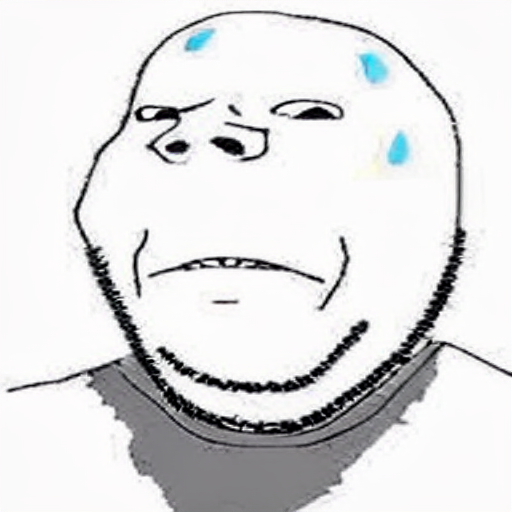

i: 2, loss: 0.857218, losses: 0.857218


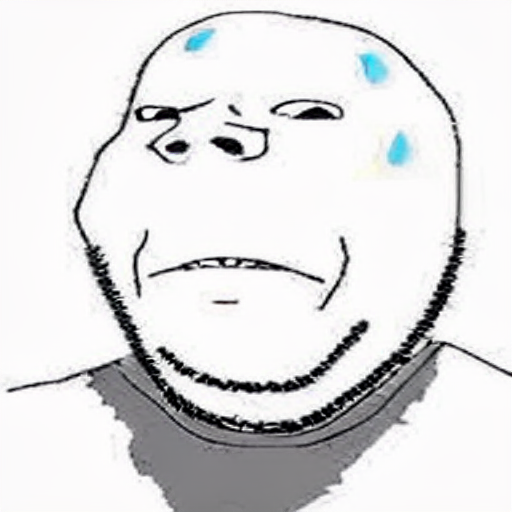

i: 4, loss: 0.817377, losses: 0.817377


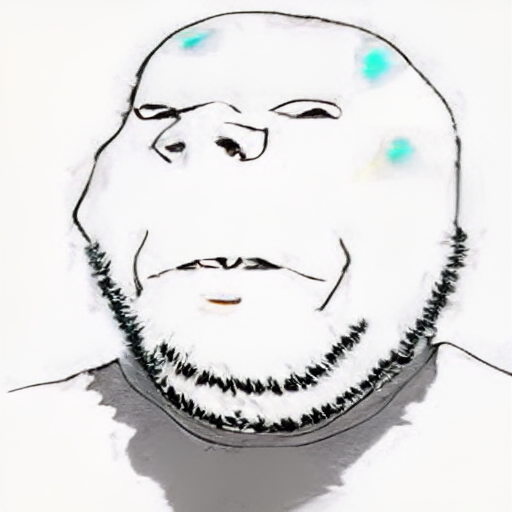

i: 6, loss: 0.793397, losses: 0.793397


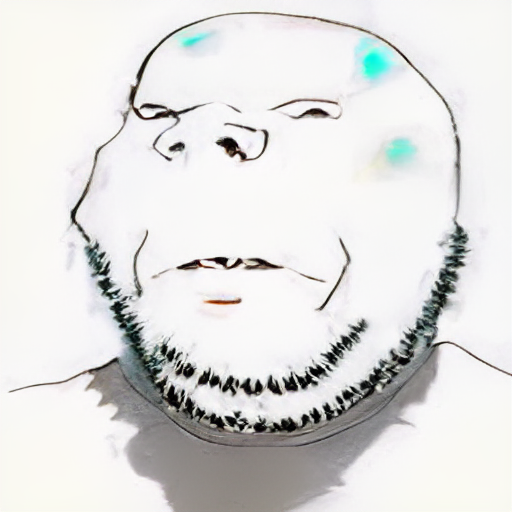

i: 8, loss: 0.789267, losses: 0.789267


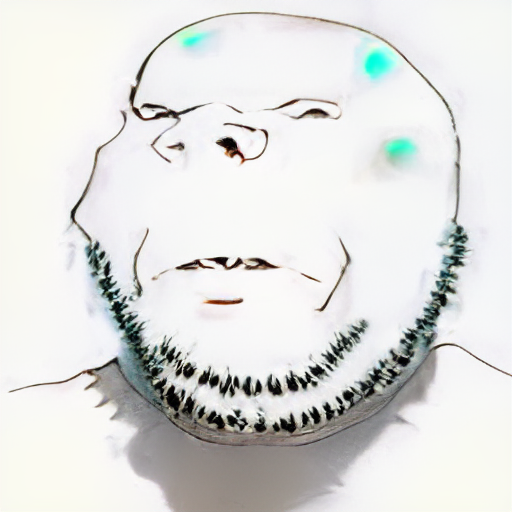

i: 10, loss: 0.767755, losses: 0.767755


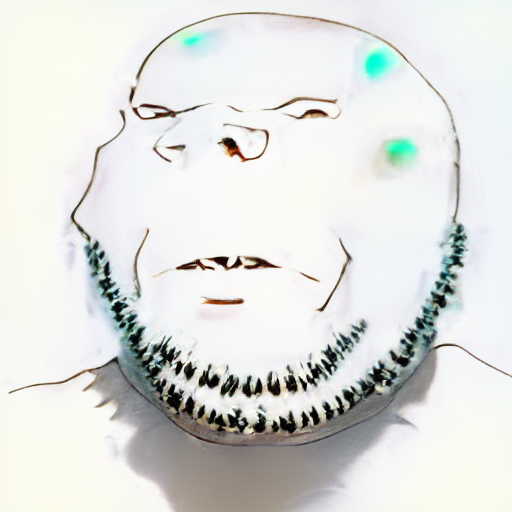

i: 12, loss: 0.75868, losses: 0.75868


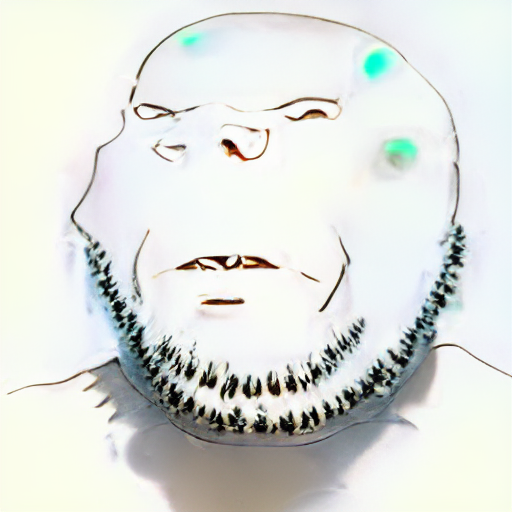

i: 14, loss: 0.731103, losses: 0.731103


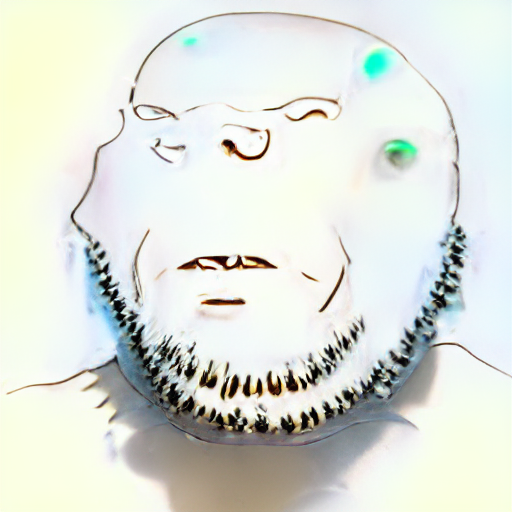

i: 16, loss: 0.730534, losses: 0.730534


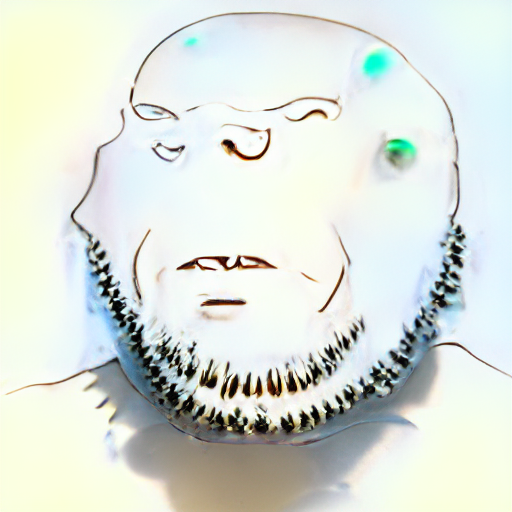

i: 18, loss: 0.722317, losses: 0.722317


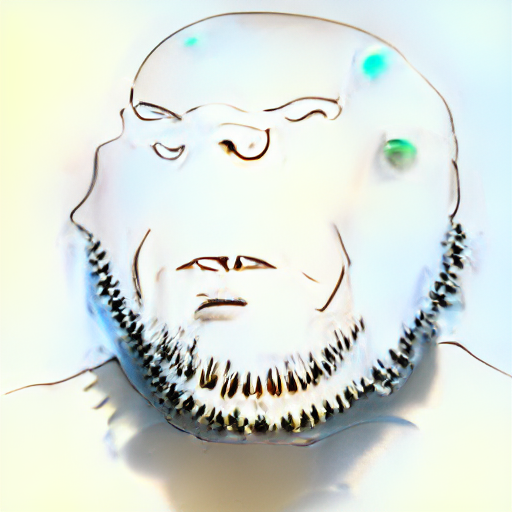

i: 20, loss: 0.719438, losses: 0.719438


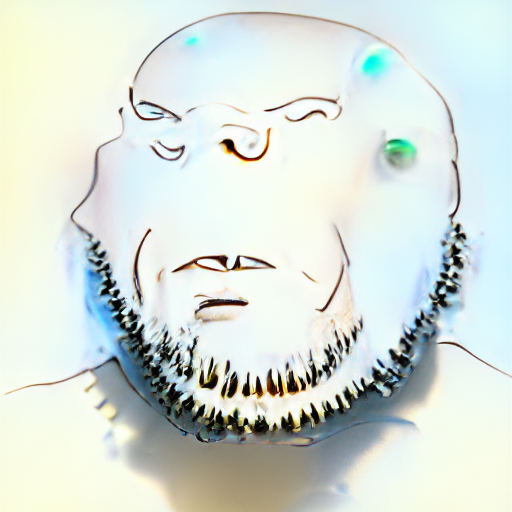

i: 22, loss: 0.725627, losses: 0.725627


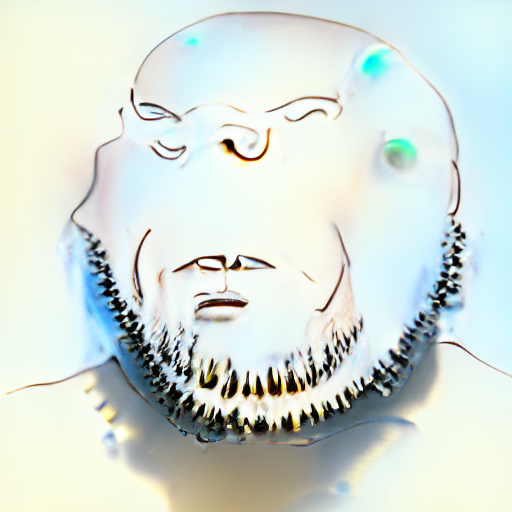

i: 24, loss: 0.713521, losses: 0.713521


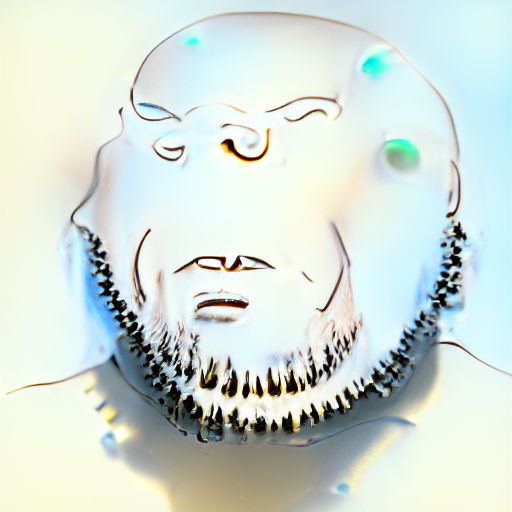

i: 26, loss: 0.718001, losses: 0.718001


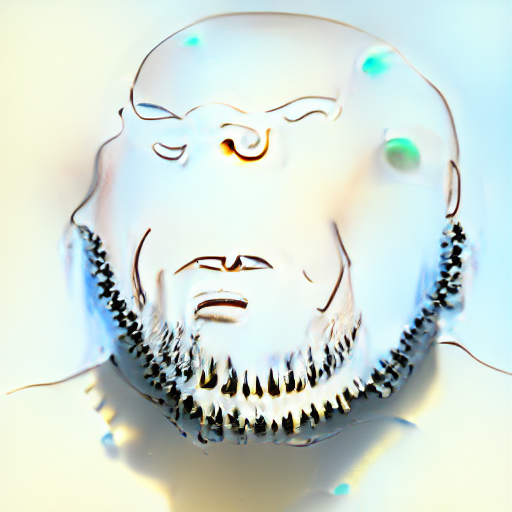

i: 28, loss: 0.707431, losses: 0.707431


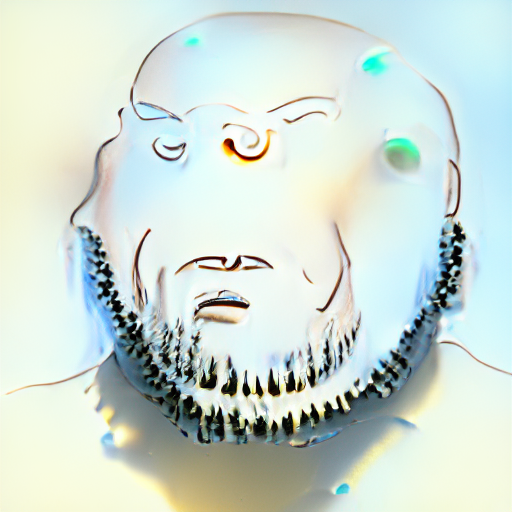

i: 30, loss: 0.699245, losses: 0.699245


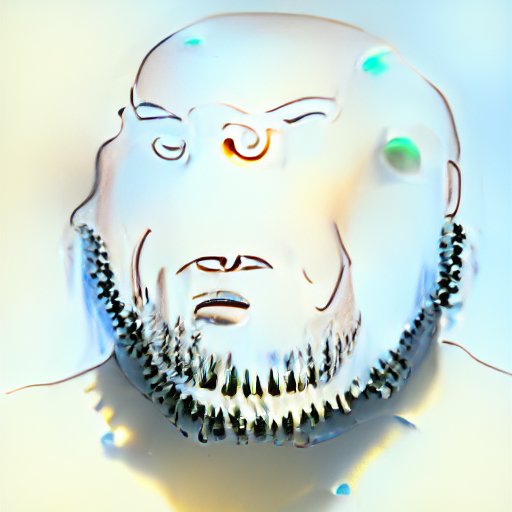

i: 32, loss: 0.698441, losses: 0.698441


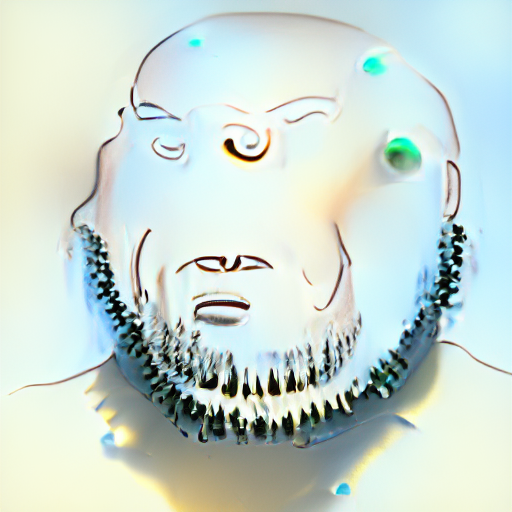

In [ ]:

#@title Do the execution...
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
if texts:
    print('Using texts:', texts)
if target_image:
    print('Using image prompts:', target_image)
if args.seed is None:
    seed = torch.seed()
else:
    seed = args.seed
torch.manual_seed(seed)
print('Using seed:', seed)

model = load_vqgan_model(args.vqgan_config, args.vqgan_checkpoint).to(device)
perceptor = clip.load(args.clip_model, jit=False)[0].eval().requires_grad_(False).to(device)

cut_size = perceptor.visual.input_resolution
if is_gumbel:
    e_dim = model.quantize.embedding_dim
else:
    e_dim = model.quantize.e_dim

f = 2**(model.decoder.num_resolutions - 1)
make_cutouts = MakeCutouts(cut_size, args.cutn, cut_pow=args.cut_pow)
if is_gumbel:
    n_toks = model.quantize.n_embed
else:
    n_toks = model.quantize.n_e

toksX, toksY = args.size[0] // f, args.size[1] // f
sideX, sideY = toksX * f, toksY * f
if is_gumbel:
    z_min = model.quantize.embed.weight.min(dim=0).values[None, :, None, None]
    z_max = model.quantize.embed.weight.max(dim=0).values[None, :, None, None]
else:
    z_min = model.quantize.embedding.weight.min(dim=0).values[None, :, None, None]
    z_max = model.quantize.embedding.weight.max(dim=0).values[None, :, None, None]

if args.init_image:
    pil_image = Image.open(args.init_image).convert('RGB')
    pil_image = pil_image.resize((sideX, sideY), Image.LANCZOS)
    z, *_ = model.encode(TF.to_tensor(pil_image).to(device).unsqueeze(0) * 2 - 1)
else:
    one_hot = F.one_hot(torch.randint(n_toks, [toksY * toksX], device=device), n_toks).float()
    if is_gumbel:
        z = one_hot @ model.quantize.embed.weight
    else:
        z = one_hot @ model.quantize.embedding.weight
    z = z.view([-1, toksY, toksX, e_dim]).permute(0, 3, 1, 2)
z_orig = z.clone()
z.requires_grad_(True)
opt = optim.Adam([z], lr=args.step_size)

#ORIGINAL
#normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
#                                 std=[0.26862954, 0.26130258, 0.27577711])

#MOD1
normalize = transforms.Normalize(mean=[0.49145466, 0.4678275, 0.41821073],
                                 std=[0.27862954, 0.27130258, 0.28577711])


pMs = []

for prompt in args.prompts:
    txt, weight, stop = parse_prompt(prompt)
    embed = perceptor.encode_text(clip.tokenize(txt).to(device)).float()
    pMs.append(Prompt(embed, weight, stop).to(device))

for prompt in args.image_prompts:
    path, weight, stop = parse_prompt(prompt)
    img = resize_image(Image.open(path).convert('RGB'), (sideX, sideY))
    batch = make_cutouts(TF.to_tensor(img).unsqueeze(0).to(device))
    embed = perceptor.encode_image(normalize(batch)).float()
    pMs.append(Prompt(embed, weight, stop).to(device))

for seed, weight in zip(args.noise_prompt_seeds, args.noise_prompt_weights):
    gen = torch.Generator().manual_seed(seed)
    embed = torch.empty([1, perceptor.visual.output_dim]).normal_(generator=gen)
    pMs.append(Prompt(embed, weight).to(device))

def synth(z):
    if is_gumbel:
        z_q = vector_quantize(z.movedim(1, 3), model.quantize.embed.weight).movedim(3, 1)
    else:
        z_q = vector_quantize(z.movedim(1, 3), model.quantize.embedding.weight).movedim(3, 1)
    
    return clamp_with_grad(model.decode(z_q).add(1).div(2), 0, 1)

def add_xmp_data(nombrefichero):
    imagen = ImgTag(filename=nombrefichero)
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'creator', 'VQGAN+CLIP', {"prop_array_is_ordered":True, "prop_value_is_array":True})
    if args.prompts:
        imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'title', " | ".join(args.prompts), {"prop_array_is_ordered":True, "prop_value_is_array":True})
    else:
        imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'title', 'None', {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'i', str(i), {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'model', model_name, {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'seed',str(seed) , {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'input_images',str(input_images) , {"prop_array_is_ordered":True, "prop_value_is_array":True})
    #for frases in args.prompts:
    #    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'Prompt' ,frases, {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.close()

def add_stegano_data(filename):
    data = {
        "title": " | ".join(args.prompts) if args.prompts else None,
        "notebook": "VQGAN+CLIP",
        "i": i,
        "model": model_name,
        "seed": str(seed),
        "input_images": input_images
    }
    lsb.hide(filename, json.dumps(data)).save(filename)

@torch.no_grad()
def checkin(i, losses):
    losses_str = ', '.join(f'{loss.item():g}' for loss in losses)
    tqdm.write(f'i: {i}, loss: {sum(losses).item():g}, losses: {losses_str}')
    out = synth(z)
    TF.to_pil_image(out[0].cpu()).save('progress.png')
    add_stegano_data('progress.png')
    add_xmp_data('progress.png')
    display.display(display.Image('progress.png'))

def ascend_txt():
    global i
    out = synth(z)
    iii = perceptor.encode_image(normalize(make_cutouts(out))).float()

    result = []

    if args.init_weight:
        result.append(F.mse_loss(z, z_orig) * args.init_weight / 2)

    for prompt in pMs:
        result.append(prompt(iii))
    img = np.array(out.mul(255).clamp(0, 255)[0].cpu().detach().numpy().astype(np.uint8))[:,:,:]
    img = np.transpose(img, (1, 2, 0))
    filename = f"steps/{i:04}.png"
    imageio.imwrite(filename, np.array(img))
    add_stegano_data(filename)
    add_xmp_data(filename)
    return result

def train(i):
    opt.zero_grad()
    lossAll = ascend_txt()
    if i % args.display_freq == 0:
        checkin(i, lossAll)
    loss = sum(lossAll)
    loss.backward()
    opt.step()
    with torch.no_grad():
        z.copy_(z.maximum(z_min).minimum(z_max))

i = 0
try:
    with tqdm() as pbar:
        while True:
            train(i)
            if i == max_iterations:
                break
            i += 1
            pbar.update()
except KeyboardInterrupt:
    pass

## Generate a video with the results

Click in the cell to modify defualt video settings.

Users can modify: `init_frame`, `last_frame`, `min_fps`, `max_fps`,  and `length`



In [ ]:
init_frame = 0      # This is the frame where the video will start. If not using an initial image, setting to 1 produces a video which begins as random white noise and evolves, but makes for poor thumbnail when posting to image boards
last_frame = i      # i is the final frame produced; You can change i to the number of the last frame you want to generate. It will raise an error if that number of frames does not exist.

min_fps = 20
max_fps = 70

length = 10        # Desired video time in seconds

total_frames = last_frame-init_frame

# thumbnail_frame = f"steps/{max_iterations:04}.png"

frames = []
tqdm.write('Generating video...')
for i in range(init_frame,last_frame): 
    filename = f"steps/{i:04}.png"
    frames.append(Image.open(filename))

frames.insert(0,frames.pop())

fps = np.clip(total_frames/length,min_fps,max_fps)

# a subprocess which converts images to mp4 file
from subprocess import Popen, PIPE
p = Popen(['ffmpeg', '-y', '-f', 'image2pipe', '-vcodec', 'png', '-r', str(fps), '-i', '-', '-vcodec', 'libx264', '-r', str(fps), '-pix_fmt', 'yuv420p', '-crf', '17', '-preset', 'veryslow', 'video.mp4'], stdin=PIPE)
for im in tqdm(frames):
    im.save(p.stdin, 'PNG')
p.stdin.close()

print("The mp4 video is being compressed now, wait...")
p.wait()
print("The mp4 video is ready")



Generating video...


  0%|          | 0/32 [00:00<?, ?it/s]

The mp4 video is being compressed now, wait...
The mp4 video is ready


In [ ]:
# @title View video in browser
# @markdown This process may take a little longer. If you don't want to wait, download it by executing the next cell instead of using this cell.
mp4 = open('video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
display.HTML("""
<video width=512 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
# @title Automatic Video Download
import os
from google.colab import files
video_name = prompt.replace(' ', '_')
os.rename('./video.mp4', f"./{video_name}.mp4")
files.download(f"./{video_name}.mp4")
print(video_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

heavy_set_male_face_with_light_beard_expresses_a_concerned_appearance_while_sweat_beads_on_his_bald_head_in_the_style_of_biomorphic_physically_based_rendering


In [ ]:
# rename the renamed file in order to overwrite next session
os.rename(f"{video_name}.mp4", 'video.mp4')

# Attribution

LucidDreamer v.0.0.01 
- an enhanced fork of VQgan+CLIP by @cosm.loci

The original BigGAN + CLIP method was made by https://twitter.com/advadnoun. 
 
The original VQGAN and CLIP (z + quantize method with augmentations) by Katherine Crowson (https://github.com/crowsonkb, https://twitter.com/RiversHaveWings): 

A branch was then translated into Spanish and initial added explanations/modifications by Eleiber # 8347, and the friendly interface was made thanks to Abulafia # 3734. - https://colab.research.google.com/drive/1go6YwMFe5MX6XM9tv-cnQiSTU50N9EeT?fbclid=IwAR30ZqxIJG0-2wDukRydFA3jU5OpLHrlC_Sg1iRXqmoTkEhaJtHdRi6H7AI#scrollTo=mFo5vz0UYBrF

This 'LucidDreamer' fork was created during the summer of 2021 in order to make available an English language version with additional enhancements to interface and outputs. 

Text Translation from Spanish to English by Google Translate.  Code translation from spanish to english; additional user guides and additional enhancements to interface and media handling provided by @cosm.loci 


In [ ]:
# One Love. One Tribe. World Wide. #OLOTWW